In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

In [21]:
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nClass Distribution:")
print(df['Outcome'].value_counts())

Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

In [22]:
# Check for missing values (0 in medical data often represents missing values)
# Replace 0 with NaN for columns where 0 is not biologically plausible
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

In [23]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [24]:
X = df.drop('Outcome', axis=1) #Features
y = df['Outcome']  #target

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [28]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.7078
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
[[82 18]
 [27 27]]

Support Vector Machine Results:
Accuracy: 0.7403
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154

Confusion Matrix:
[[84 16]
 [24 30]]

Random Forest Results:
Accuracy: 0.7273
Classification Report:
              precision    recall  f1-score   support

          


Model Comparison:
Logistic Regression: 0.7078
Support Vector Machine: 0.7403
Random Forest: 0.7273
K-Nearest Neighbors: 0.7532
Decision Tree: 0.6688


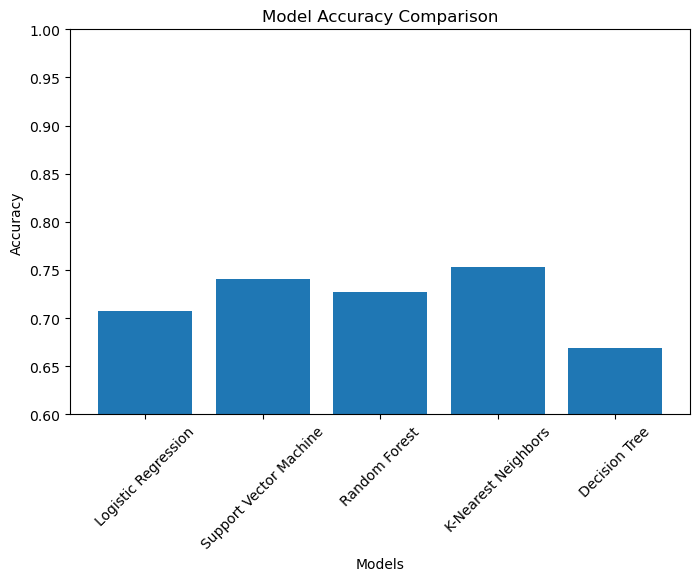

In [29]:
# Compare model performance
print("\nModel Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Plot model comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Feature importance for the best performing model (Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)
feature_importance = best_model.feature_importances_
features = X.columns

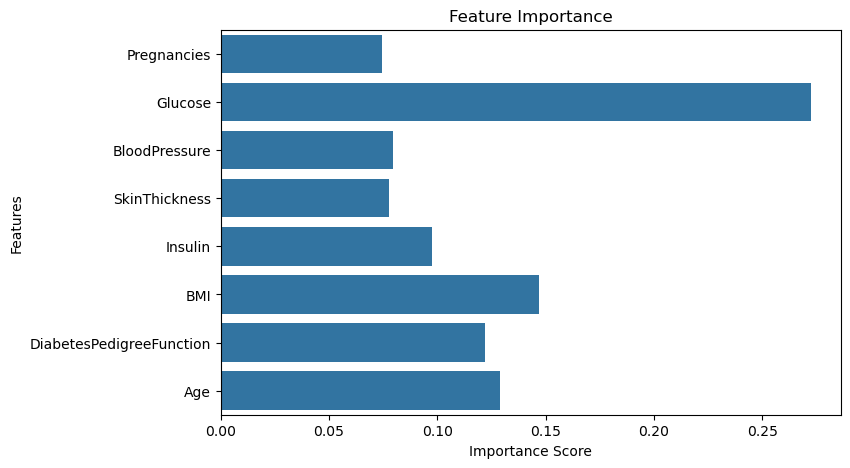

In [31]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [32]:
# Saving best model&scalar
import joblib
joblib.dump(best_model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!
